In [4]:
from qmath.func.fbe import CosFbe
from qmath.utils.test_utils import QPUTestHelper
from psiqworkbench import QPU, QFixed
from psiqworkbench.filter_presets import BIT_DEFAULT

import numpy as np
from matplotlib import pyplot as plt

qpu_helper = QPUTestHelper(num_qubits=5000, qubits_per_reg=32, radix=30, num_inputs=1)
q_x = qpu_helper.inputs[0]
func = CosFbe(result_radix=60)
func.compute(q_x)
qpu_helper.record_op(func.get_result_qreg())

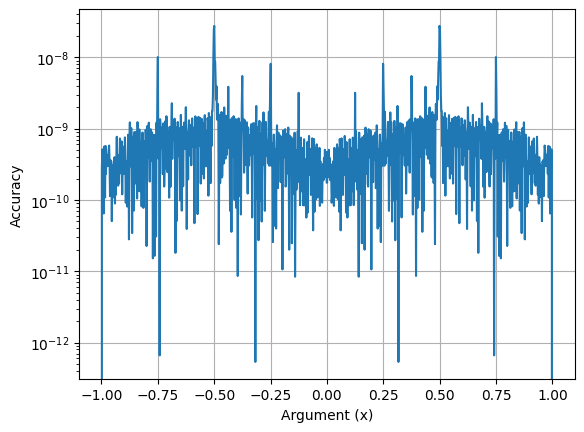

In [6]:
x_range = np.linspace(-1, 1, 1000)
diffs = [np.abs(qpu_helper.apply_op([x]) - np.cos(np.pi * x)) for x in x_range]

plt.plot(x_range, diffs)
plt.yscale('log')
plt.xlabel('Argument (x)')
plt.ylabel('Accuracy')
plt.grid()